SARSA算法因为是同策略,理论上不能用池化,所以这里来实现无池化版本的代码

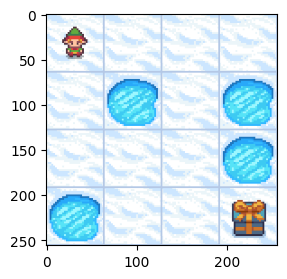

In [1]:
import gym


#定义环境
class MyWrapper(gym.Wrapper):

    def __init__(self):
        #is_slippery控制会不会滑
        env = gym.make('FrozenLake-v1',
                       render_mode='rgb_array',
                       is_slippery=False)

        super().__init__(env)
        self.env = env

    def reset(self):
        state, _ = self.env.reset()
        return state

    def step(self, action):
        state, reward, terminated, truncated, info = self.env.step(action)
        over = terminated or truncated

        #走一步扣一份,逼迫机器人尽快结束游戏
        if not over:
            reward = -1

        #掉坑扣100分
        if over and reward == 0:
            reward = -100

        return state, reward, over

    #打印游戏图像
    def show(self):
        from matplotlib import pyplot as plt
        plt.figure(figsize=(3, 3))
        plt.imshow(self.env.render())
        plt.show()


env = MyWrapper()

env.reset()

env.show()

In [2]:
import numpy as np

#初始化Q表,定义了每个状态下每个动作的价值
Q = np.zeros((16, 4))

Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [3]:
from IPython import display
import random


#玩一局游戏并记录数据
def play(show=False):
    data = []
    reward_sum = 0

    state = env.reset()
    over = False
    while not over:
        action = Q[state].argmax()
        if random.random() < 0.1:
            action = env.action_space.sample()

        next_state, reward, over = env.step(action)

        data.append((state, action, reward, next_state, over))
        reward_sum += reward

        state = next_state

        if show:
            display.clear_output(wait=True)
            env.show()

    return data, reward_sum


play()[-1]

-144

In [4]:
#训练
def train():
    #共更新N轮数据
    for epoch in range(2000):

        #玩一局游戏并得到数据
        for (state, action, reward, next_state, over) in play()[0]:

            #Q矩阵当前估计的state下action的价值
            value = Q[state, action]

            #实际玩了之后得到的reward+(next_state,next_action)的价值*0.9
            target = reward + Q[next_state, Q[next_state].argmax()] * 0.9

            #value和target应该是相等的,说明Q矩阵的评估准确
            #如果有误差,则应该以target为准更新Q表,修正它的偏差
            #这就是TD误差,指评估值之间的偏差,以实际成分高的评估为准进行修正
            update = (target - value) * 0.02

            #更新Q表
            Q[state, action] += update

        if epoch % 100 == 0:
            print(epoch, play()[-1])


train()

0 -101
100 -128
200 -7.0
300 -4.0
400 -6.0
500 -4.0
600 -4.0
700 -4.0
800 -4.0
900 -4.0
1000 -6.0
1100 -4.0
1200 -4.0
1300 -4.0
1400 -4.0
1500 -4.0
1600 -4.0
1700 -6.0
1800 -4.0
1900 -4.0


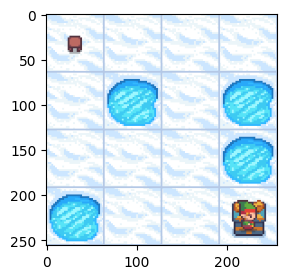

-7.0

In [5]:
play(True)[-1]